## Linear Regression Exercise
 - One of the biggest changes will be observed when you include the 'Model' feature we dropped in the beginning.
 - Perform feature selection
 - Create a regression where 'Price' is not transformed
 - Deal with the outliers in a different way

In [37]:
# Import pandas, numpy, matplotlib, seaborn, sklearn
import numpy as np

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

from sklearn.linear_model import LinearRegression

### Loading Data

In [38]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

#### Exploring the descriptive statistics of the variables

In [39]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Let's include model variable in the datset for model analysis

#### Dealing with Missing values

In [40]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [41]:
data_no = data.dropna(axis=0)

In [42]:
data_no.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring PDFs

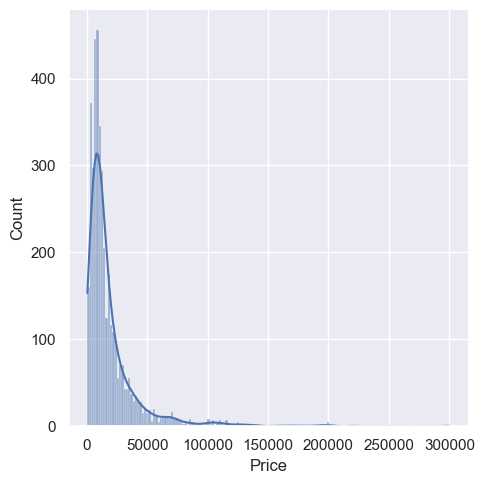

In [43]:
sns.displot(data_no["Price"],kde=True)

### Dealing with Outliers

In [44]:
# Let's remove outlier using 1.5 * IQR for pricing
percentile25 = data_no['Price'].quantile(0.25)
percentile75 = data_no['Price'].quantile(0.75)

print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  21900.0
25th quartile:  6999.0


In [45]:
iqr = percentile75 - percentile25
iqr

np.float64(14901.0)

In [46]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 44251.5
Lower limit -15352.5


In [47]:
data_no['Price'].min()

np.float64(600.0)

In [48]:
data_out = data_no[data_no['Price']<upper_limit]
data_out.shape

(3670, 9)

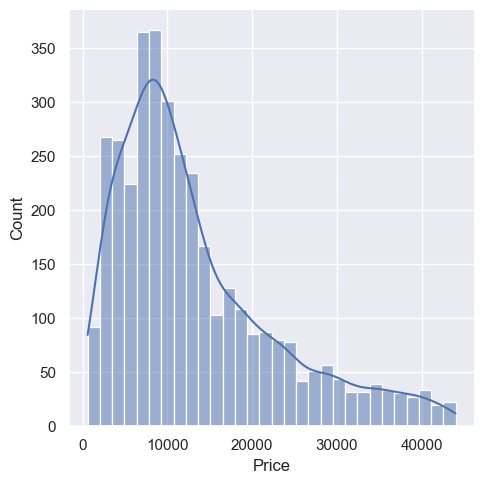

In [49]:
sns.displot(data_out["Price"],kde=True)

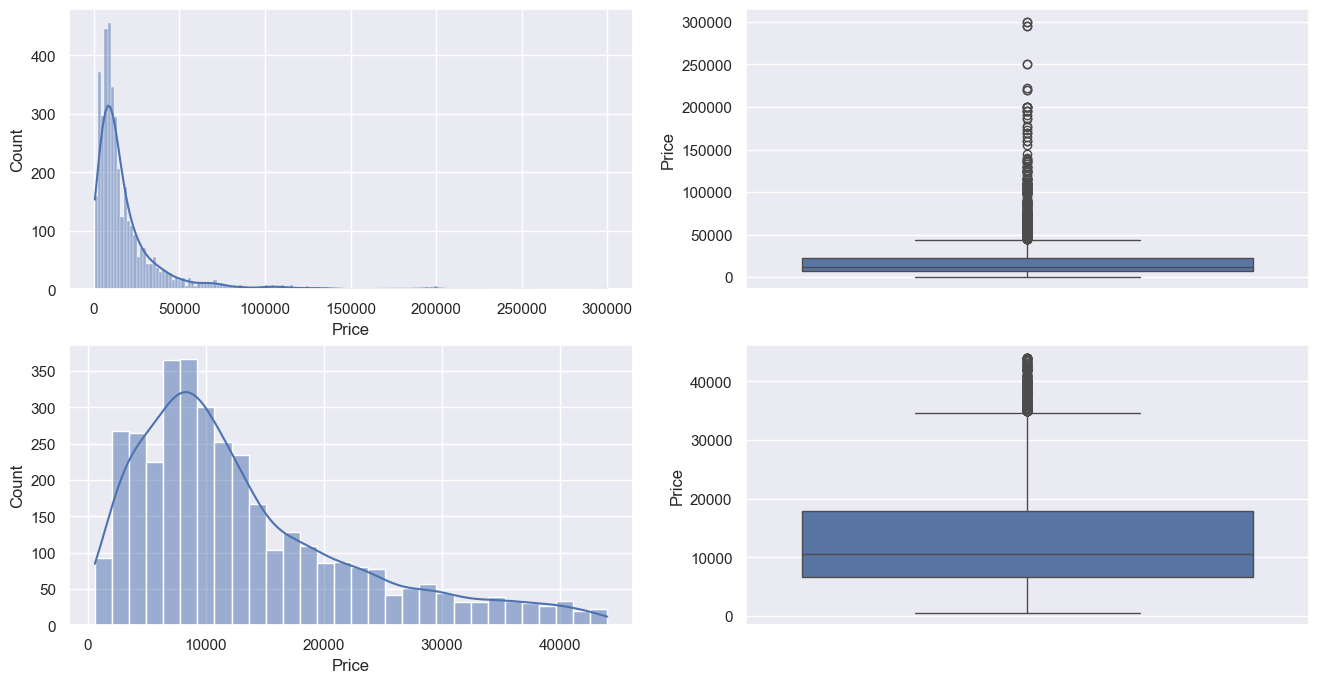

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(data_no['Price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = data_no['Price'])

plt.subplot(2,2,3)
sns.histplot(data_out['Price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = data_out['Price'])

plt.show()

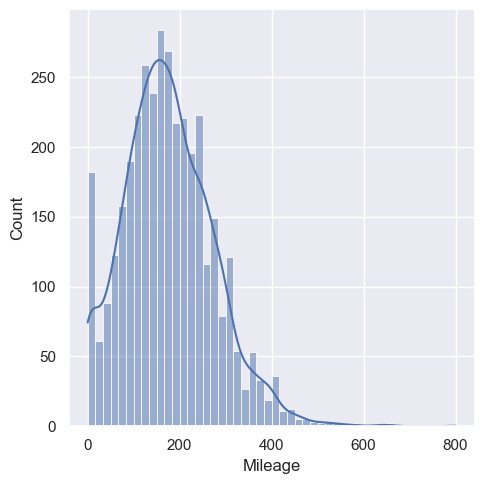

In [51]:
sns.displot(data_out["Mileage"],kde=True)

In [52]:
data_out.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3670,3670.000000,3670,3670.000000,3670.000000,3670,3670,3670.000000,3670
unique,7,NaN,6,NaN,NaN,4,2,NaN,283
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,853,NaN,1459,NaN,NaN,1631,3299,NaN,186
mean,NaN,13338.795207,NaN,175.567575,2.697172,NaN,NaN,2005.639237,NaN
std,NaN,9581.344371,NaN,97.581022,5.151714,NaN,NaN,6.519617,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6650.000000,NaN,108.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10500.000000,NaN,168.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,17900.000000,NaN,238.000000,2.800000,NaN,NaN,2011.000000,NaN


In [53]:
data_out =  data_out[data_out['EngineV'] <= 6.5]
data_out.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3648,3648.000000,3648,3648.000000,3648.000000,3648,3648,3648.000000,3648
unique,7,NaN,6,NaN,NaN,4,2,NaN,282
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1448,NaN,NaN,1624,3283,NaN,186
mean,NaN,13374.520946,NaN,175.432566,2.371022,NaN,NaN,2005.652412,NaN
std,NaN,9591.013141,NaN,97.646651,0.899402,NaN,NaN,6.519954,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6700.000000,NaN,108.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10500.000000,NaN,168.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,17900.000000,NaN,238.000000,2.800000,NaN,NaN,2011.000000,NaN


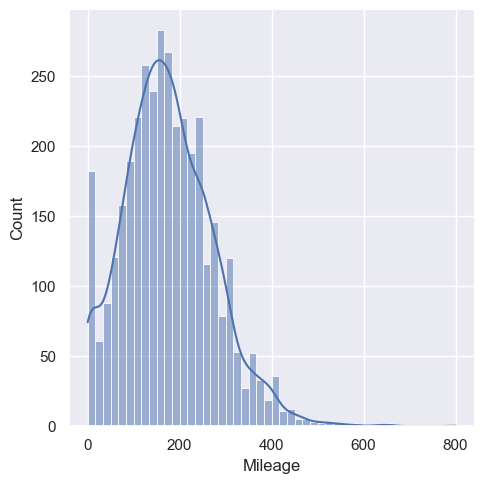

In [54]:
sns.displot(data_out["Mileage"],kde=True)

In [55]:
data_cleaned = data_out 

### Checking OLS Assumpution

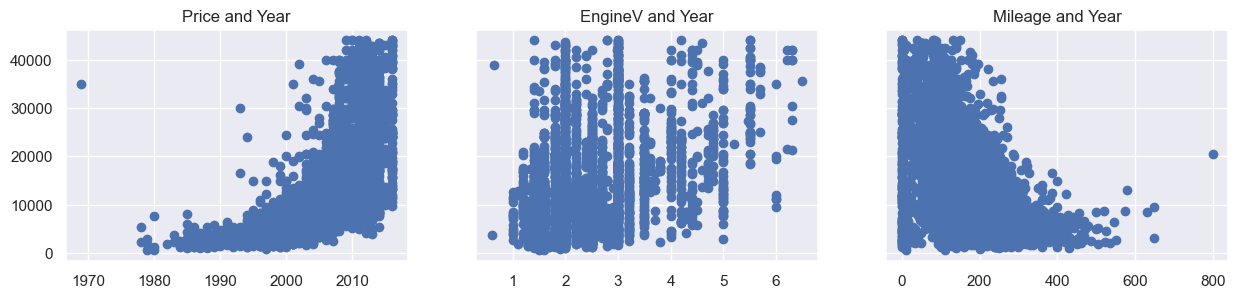

In [56]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title('EngineV and Year')
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title('Mileage and Year')

plt.show()

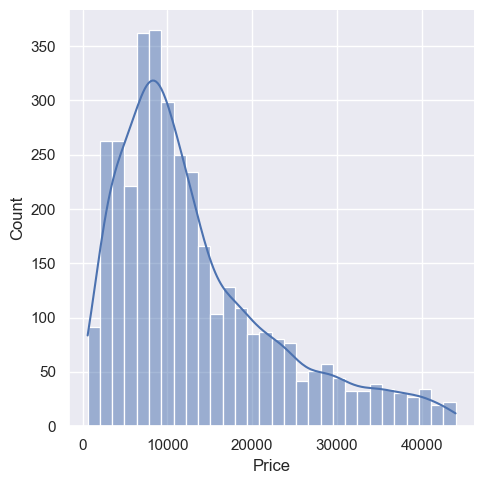

In [57]:
sns.displot(data_cleaned["Price"], kde=True)

#### Multi Colinerity

In [58]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[["Mileage", "EngineV", "Year"]]
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [60]:
variables = data_cleaned[["Mileage", "EngineV", "Year"]]

# Computing VIF
vif = pd.DataFrame()
vif["features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [61]:
vif

,features,VIF
0,Mileage,4.239265
1,EngineV,8.019066
2,Year,10.300079


### Create Dummy Variables

In [62]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,1999,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,2003,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
data_with_dummies.shape

(3648, 300)

#### Rearrange bit

In [64]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_324',
       'Model_325', 'Model_328', 'Model_330', 'Model_335', 'Model_428',
       'Model_4Runner', 'Model_5', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_630',
       'Model_645', 'Model_650', 'Model_730', 'Model_735', 'Model_740',
       'Model_745', '

In [65]:
cols = ['Price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_21', 'Model_210',
       'Model_220', 'Model_230', 'Model_25', 'Model_250', 'Model_300',
       'Model_316', 'Model_318', 'Model_320', 'Model_323', 'Model_324',
       'Model_325', 'Model_328', 'Model_330', 'Model_335', 'Model_428',
       'Model_4Runner', 'Model_5', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_630',
       'Model_645', 'Model_650', 'Model_730', 'Model_735', 'Model_740',
       'Model_745', 'Model_750', 'Model_760', 'Model_80', 'Model_9',
       'Model_90', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_ASX', 'Model_Amarok', 'Model_Auris',
       'Model_Avalon', 'Model_Avensis', 'Model_Aygo', 'Model_B 170',
       'Model_B 180', 'Model_B 200', 'Model_Beetle', 'Model_Bora',
       'Model_C-Class', 'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG',
       'Model_CL 550', 'Model_CL 63 AMG', 'Model_CLA 200',
       'Model_CLA 220', 'Model_CLA-Class', 'Model_CLC 180',
       'Model_CLC 200', 'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230',
       'Model_CLK 240', 'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430',
       'Model_CLS 350', 'Model_CLS 63 AMG', 'Model_Caddy', 'Model_Camry',
       'Model_Captur', 'Model_Caravelle', 'Model_Carina', 'Model_Carisma',
       'Model_Celica', 'Model_Clio', 'Model_Colt', 'Model_Corolla',
       'Model_Corolla Verso', 'Model_Cross Touran', 'Model_Dokker',
       'Model_Duster', 'Model_E-Class', 'Model_Eclipse', 'Model_Eos',
       'Model_Espace', 'Model_FJ Cruiser', 'Model_Fluence',
       'Model_Fortuner', 'Model_G 320', 'Model_G 500', 'Model_G 63 AMG',
       'Model_GL 320', 'Model_GL 420', 'Model_GL 450', 'Model_GL 500',
       'Model_GL 550', 'Model_GLK 220', 'Model_GLK 300', 'Model_Galant',
       'Model_Golf GTI', 'Model_Golf II', 'Model_Golf III',
       'Model_Golf IV', 'Model_Golf Plus', 'Model_Golf V',
       'Model_Golf VI', 'Model_Golf VII', 'Model_Golf Variant',
       'Model_Grand Scenic', 'Model_Grandis', 'Model_Hiace',
       'Model_Highlander', 'Model_Hilux', 'Model_I3', 'Model_IQ',
       'Model_Jetta', 'Model_Kangoo', 'Model_Koleos', 'Model_L 200',
       'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 80', 'Model_Land Cruiser Prado',
       'Model_Latitude', 'Model_Lite Ace', 'Model_Logan', 'Model_Lupo',
       'Model_M5', 'Model_MB', 'Model_ML 250', 'Model_ML 270',
       'Model_ML 280', 'Model_ML 320', 'Model_ML 350', 'Model_ML 400',
       'Model_ML 430', 'Model_ML 500', 'Model_ML 550', 'Model_ML 63 AMG',
       'Model_Mark II', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B2', 'Model_Passat B3', 'Model_Passat B4',
       'Model_Passat B5', 'Model_Passat B6', 'Model_Passat B7',
       'Model_Passat B8', 'Model_Passat CC', 'Model_Phaeton',
       'Model_Pointer', 'Model_Polo', 'Model_Previa', 'Model_Prius',
       'Model_Q3', 'Model_Q5', 'Model_Q7', 'Model_R 320', 'Model_Rav 4',
       'Model_S 140', 'Model_S 280', 'Model_S 300', 'Model_S 320',
       'Model_S 350', 'Model_S 400', 'Model_S 420', 'Model_S 430',
       'Model_S 500', 'Model_S 550', 'Model_S 600', 'Model_S 63 AMG',
       'Model_S 65 AMG', 'Model_S4', 'Model_S5', 'Model_S8',
       'Model_SL 500 (550)', 'Model_SL 55 AMG', 'Model_SLK 200',
       'Model_SLK 350', 'Model_Sandero', 'Model_Sandero StepWay',
       'Model_Scenic', 'Model_Scion', 'Model_Scirocco', 'Model_Sequoia',
       'Model_Sharan', 'Model_Sienna', 'Model_Smart', 'Model_Space Star',
       'Model_Space Wagon', 'Model_Sprinter', 'Model_Sprinter 208',
       'Model_Sprinter 210', 'Model_Sprinter 211', 'Model_Sprinter 212',
       'Model_Sprinter 213', 'Model_Sprinter 311', 'Model_Sprinter 312',
       'Model_Sprinter 313', 'Model_Sprinter 315', 'Model_Sprinter 316',
       'Model_Sprinter 318', 'Model_Sprinter 319', 'Model_Symbol',
       'Model_Syncro', 'Model_T2 (Transporter)', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [66]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,1999,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,2003,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


#### Linear Regression
##### Declare the input and the target

In [113]:
targets = data_preprocessed["Price"]
inputs = data_preprocessed.drop(["Price"], axis=1)

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [116]:
inputs_scaled = scaler.transform(inputs)

##### Training & Testing Dataset


In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

##### Create Liner Regression

In [118]:
x_train.shape

(2918, 68)

In [119]:
y_train.shape

(2918,)

In [120]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [121]:
y_hat = reg.predict(x_train)

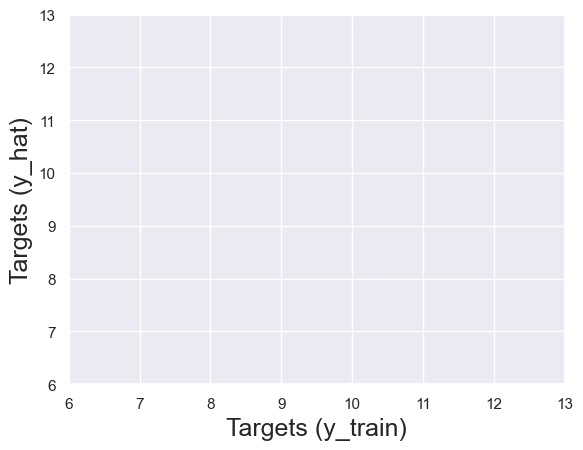

In [122]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Targets (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

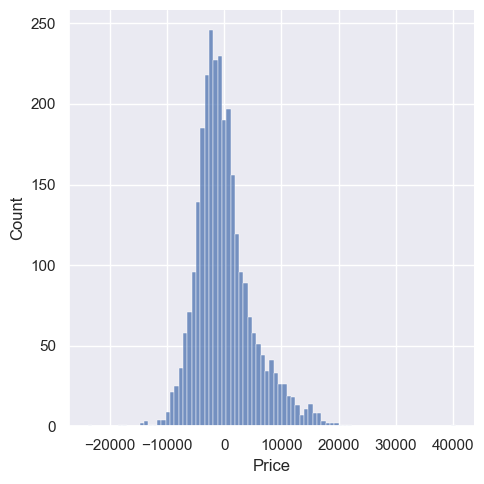

In [123]:
sns.displot(y_train-y_hat)

In [124]:
reg.score(x_train, y_train)

0.7224584883615472

In [82]:
reg.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [83]:
reg.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [84]:
len(inputs.columns.values)

NameError: name 'inputs' is not defined

In [85]:
Coef  =  pd.DataFrame()
Coef["Features"] = inputs.columns.values
Coef["Weights"] = reg.coef_
Coef.head(20)

NameError: name 'inputs' is not defined

##### Testing

In [86]:
y_hat_test = reg.predict(x_test)

NameError: name 'x_test' is not defined

In [87]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Targets (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() 

NameError: name 'y_test' is not defined

In [88]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Targets (y_hat_test)", size=18)
plt.xlim(0,13)
plt.ylim(0,13)
plt.show()

NameError: name 'y_test' is not defined

In [89]:
df_pf = pd.DataFrame(y_hat_test, columns=["Pred"])
df_pf

NameError: name 'y_hat_test' is not defined

In [90]:
df_pf["Target"] = (y_test)
df_pf.head()

NameError: name 'y_test' is not defined

In [91]:
y_test = y_test.reset_index(drop=True)

NameError: name 'y_test' is not defined

In [92]:
df_pf["Target"] = (y_test)
df_pf.head()

NameError: name 'y_test' is not defined

In [93]:
df_pf["residual"] =  df_pf["Target"] - df_pf["Pred"]

NameError: name 'df_pf' is not defined

In [94]:
df_pf.head()

NameError: name 'df_pf' is not defined

In [95]:
df_pf["Diff %"] = np.absolute(df_pf["residual"]/df_pf["Target"] * 100)

NameError: name 'df_pf' is not defined

In [96]:
df_pf.describe()

NameError: name 'df_pf' is not defined

In [97]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=["Diff %"])

NameError: name 'df_pf' is not defined